# Importações:

In [1]:
# Biblioteca para manipulação dos dados:
import pandas as pd

# Biblioteca para visualização dos dados:
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para o chi-quadrado estatísticos:
from itertools import product
import scipy.stats as ss
import itertools

# Biblioteca para manipulação de arrys:
import numpy as np

# Só pra ignorar o aviso de que o rodapé e cabeçalho foram ignorados na leitura do arquivo Excel:
import warnings

# Importação para barra de progresso:
from tqdm import tqdm

In [2]:
#Bibliotecas suporte:
from google.colab import drive

#Preparando Drive:
drive.mount('/content/drive')

Mounted at /content/drive


# Importando os dados:

In [3]:
#dataset:
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl.worksheet.header_footer")
arquivo = '/content/drive/MyDrive/Base do Censo PopRua 2020 (anonimizada).xlsx'
df = pd.read_excel(arquivo)
display(df.head(5))
print('O dataset tem {} linhas e {} variáveis, ou colunas.'.format(df.shape[0],df.shape[1]))

,Chave_única,ID,Rua_Acolhimento,Local da coleta de dados,Unidade de Acolhimento/US,Método,Instrumento de coleta,Cod_setor,Turno,Data,...,Motivo_local_uso_droga,Necessidade_sair_situação,Área de Planejamento,Nome do Bairro,Código da RP,RP,Código da RA,Região Administrativa,Faixa etária,Classificação idade
0,Rua_10000,Rua_2,Rua,Rua,NaN,Entrevista,Questionário normal,D1S21M,Manhã,26/10/2020,...,Não se aplica,Não quero sair da rua,AP 5,Paciência,5.3,5.3 - Santa Cruz,19,XIX - SANTA CRUZ,18 a 30,Adulto
1,Rua_10001,Rua_5,Rua,Rua,NaN,Entrevista,Questionário normal,D1S20M,Manhã,26/10/2020,...,Não se aplica,Família,AP 5,Campo Grande,5.2,5.2 - Campo Grande,18,XVIII - CAMPO GRANDE,31 a 49,Adulto
2,Rua_10002,Rua_6,Rua,Rua,NaN,Entrevista,Questionário normal,D1S20M,Manhã,26/10/2020,...,Não se aplica,Moradia,AP 5,Campo Grande,5.2,5.2 - Campo Grande,18,XVIII - CAMPO GRANDE,31 a 49,Adulto
3,Rua_10003,Rua_8,Rua,Rua,NaN,Entrevista,Questionário normal,D1S20M,Manhã,26/10/2020,...,Não se aplica,Não quero sair da rua,AP 5,Campo Grande,5.2,5.2 - Campo Grande,18,XVIII - CAMPO GRANDE,50 a 59,Adulto
4,Rua_10004,Rua_9,Rua,Rua,NaN,Entrevista,Questionário normal,D1S20M,Manhã,26/10/2020,...,Não se aplica,Outro,AP 5,Campo Grande,5.2,5.2 - Campo Grande,18,XVIII - CAMPO GRANDE,31 a 49,Adulto


O dataset tem 7272 linhas e 136 variáveis, ou colunas.


In [4]:
# Informações das colunas:
df.sort_index(axis=1).info(verbose=True) #Jeito de colocar as colunas em ordem alfabética

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7272 entries, 0 to 7271
Data columns (total 136 columns):
 #    Column                                                                                               Dtype  
---   ------                                                                                               -----  
 0    Abrigos_apresentam_problemas                                                                         object 
 1    Acompanhamento_pré_natal                                                                             object 
 2    Ajuda_pandemia                                                                                       object 
 3    Alimentos                                                                                            object 
 4    Aposentadoria/Pensão                                                                                 object 
 5    Asma/ Bronquite/Pneumonia                                                        

In [5]:
for i in df.keys():
    print(f'variável {i}')
    print(df[i].value_counts())
    print('\n')

variável Chave_única
Rua_10000                       1
Cenas de uso_14829              1
Cenas de uso_14855              1
Cenas de uso_14854              1
Cenas de uso_14853              1
                               ..
Rua_12420                       1
Rua_12419                       1
Rua_12418                       1
Rua_12417                       1
Unidade de acolhimento_17271    1
Name: Chave_única, Length: 7272, dtype: int64


variável ID
Abrigo_1279                     10
Abrigo_1281                     10
Abrigo_1282                     10
Abrigo_1283                     10
Abrigo_1285                     10
                                ..
Rua_4023                         1
Rua_4022                         1
Rua_4020                         1
Rua_4016                         1
Comunidades Terapêuticas_266     1
Name: ID, Length: 6788, dtype: int64


variável Rua_Acolhimento
Rua          5469
Acolhidos    1803
Name: Rua_Acolhimento, dtype: int64


variável Local da cole

# Variáveis Metodológicas:

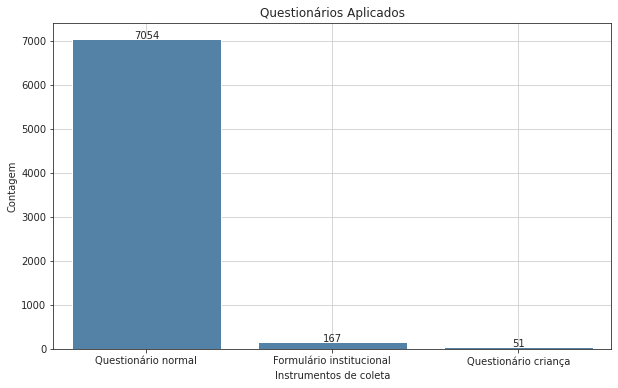

In [6]:
# Contar a quantidade de questionários por instrumento de coleta
contagem = df['Instrumento de coleta'].value_counts()

# Criar o gráfico de barras com seaborn
plt.figure(figsize=(10, 6))
sns.set_style('ticks')
sns.barplot(x=contagem.index, y=contagem, color='steelblue')

# Adicionar os valores acima de cada barra
for i, v in enumerate(contagem):
    plt.text(i, v+3, str(v), ha='center', fontsize=10)

# Definir títulos e rótulos dos eixos
plt.title("Questionários Aplicados")
plt.xlabel("Instrumentos de coleta")
plt.ylabel("Contagem")
plt.grid(True)

plt.show()

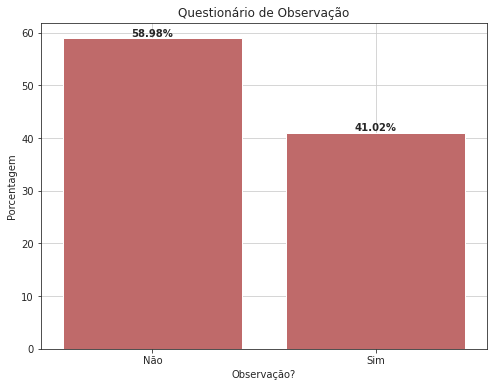

In [7]:
# Calcular a contagem e a porcentagem em relação ao total de linhas
contagem = df['Questionário de Observação'].value_counts()
porcentagem = round(contagem / len(df) * 100, 2)

# Plotar um gráfico de barras com a porcentagem
plt.figure(figsize=(8, 6))
sns.set_style('ticks')
sns.barplot(x=contagem.index, y=porcentagem, color='#CD5C5C')
plt.title('Questionário de Observação')
plt.xlabel('Observação?')
plt.ylabel('Porcentagem')
plt.grid(True)

# Adicionando as porcentagens acima de cada barra
for i, v in enumerate(porcentagem):
    plt.text(i, v, str(v) + '%', ha='center', va='bottom', fontweight='bold')

plt.show()

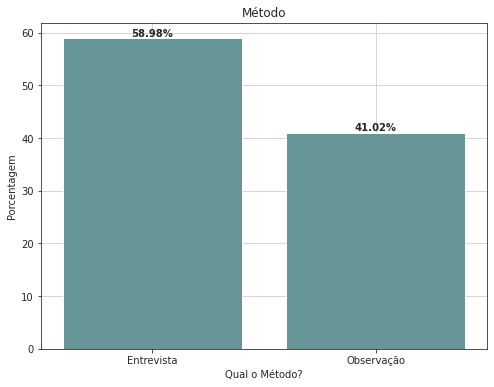

In [8]:
# Calcular a contagem e a porcentagem em relação ao total de linhas
contagem = df['Método'].value_counts()
porcentagem = round(contagem / len(df) * 100, 2)

# Plotar um gráfico de barras com a porcentagem
plt.figure(figsize=(8, 6))
sns.set_style('ticks')
sns.barplot(x=contagem.index, y=porcentagem, color='#5F9EA0')
plt.title('Método')
plt.xlabel('Qual o Método?')
plt.ylabel('Porcentagem')
plt.grid(True)

# Adicionando as porcentagens acima de cada barra
for i, v in enumerate(porcentagem):
    plt.text(i, v, str(v) + '%', ha='center', va='bottom', fontweight='bold')

plt.show()

In [9]:
# Reconhecendo as variáveis que possuem dados NaN:
enulo=df.isnull().sum()
for variavel, valor in enulo.items():
    if valor != 0.0:
        print(str(variavel)+' -> '+str(valor))

Unidade de Acolhimento/US -> 5435
Data -> 1837
Onde_estava_antes_Unidade_acolhimento -> 5435
Abrigos_apresentam_problemas -> 19


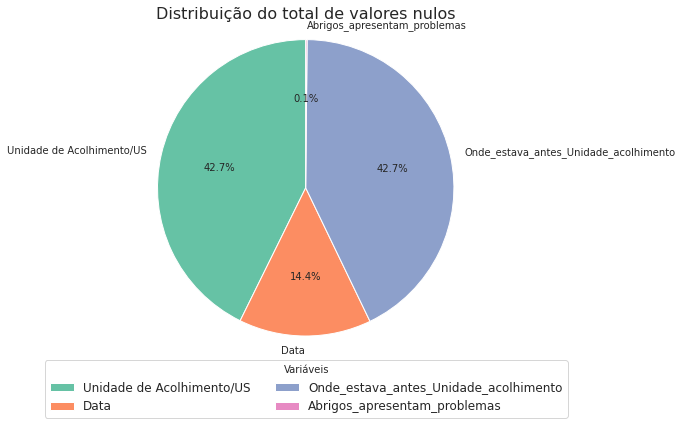

In [10]:
# Calcular o número de valores NaN em cada coluna
enulo = df.isna().sum()
vnames = enulo[enulo != 0].index.tolist()
values = enulo[enulo != 0].tolist()

# Criar o dicionário
dicionario = dict(zip(vnames, values))

# Criar gráfico de pizza
cores = sns.color_palette("Set2", len(dicionario))
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
plt.pie(dicionario.values(), colors=cores, labels=dicionario.keys(), autopct='%1.1f%%', startangle=90)
plt.title("Distribuição do total de valores nulos", fontsize=16)

# Adicionar legenda
plt.legend(loc="best", fontsize=12, title="Variáveis", bbox_to_anchor=(1.1, -.01),  ncol=2)
plt.axis('equal')
plt.show()

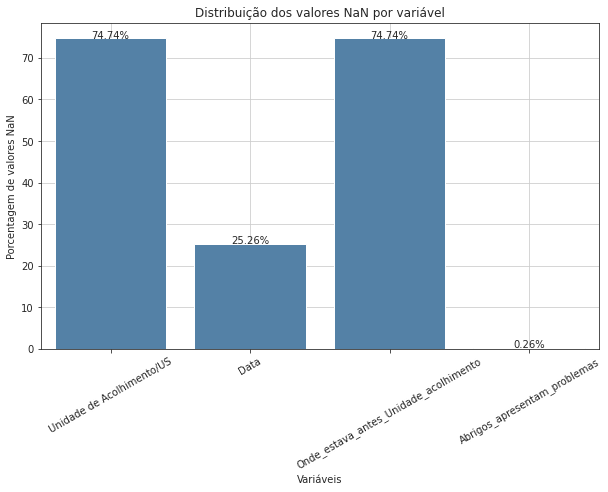

In [11]:
# Contar a quantidade de valores nulos de cada variável
valores_nulos = df.isnull().sum()

# Selecionar apenas as variáveis com valores NaN
variaveis_nulas = valores_nulos[valores_nulos > 0].index

# Calcular a porcentagem de valores NaN em cada variável
porcentagem_nulos = valores_nulos[variaveis_nulas] / len(df) * 100

# Plotar um gráfico de barras com a porcentagem de valores NaN em cada variável
plt.figure(figsize=(10, 6))
sns.set_style('ticks')
sns.barplot(x=variaveis_nulas, y=porcentagem_nulos, color='steelblue')
plt.title('Distribuição dos valores NaN por variável')
plt.xlabel('Variáveis')
plt.ylabel('Porcentagem de valores NaN')
plt.grid(True)
plt.xticks(rotation=30)

# Adicionar valores das porcentagens nas barras
for i, v in enumerate(porcentagem_nulos):
    plt.annotate(str(round(v, 2)) + '%', xy=(i, v), ha='center', va='baseline')

plt.show()

In [12]:
df['Método'].value_counts()

Entrevista    4289
Observação    2983
Name: Método, dtype: int64

In [13]:
df_obs = df[df['Método'] == 'Observação']
df_ent = df[df['Método'] == 'Entrevista']

In [14]:
df_obs['Método'].value_counts()

Observação    2983
Name: Método, dtype: int64

In [15]:
df_ent['Método'].value_counts()

Entrevista    4289
Name: Método, dtype: int64

# Observação:

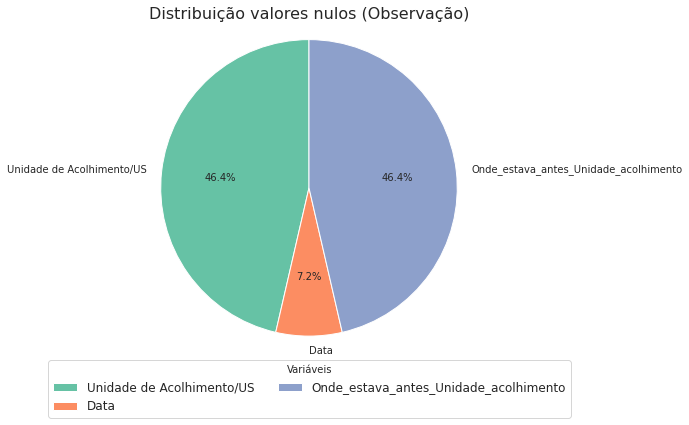

In [16]:
# Calcular o número de valores NaN em cada coluna
enulo = df_obs.isna().sum()
vnames = enulo[enulo != 0].index.tolist()
values = enulo[enulo != 0].tolist()

# Criar o dicionário
dicionario = dict(zip(vnames, values))

# Criar gráfico de pizza
cores = sns.color_palette("Set2", len(dicionario))
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
plt.pie(dicionario.values(), colors=cores, labels=dicionario.keys(), autopct='%1.1f%%', startangle=90)
plt.title("Distribuição valores nulos (Observação)", fontsize=16)

# Adicionar legenda
plt.legend(loc="best", fontsize=12, title="Variáveis", bbox_to_anchor=(1.1, -.01),  ncol=2)
plt.axis('equal')
plt.show()

In [17]:
# Reconhecendo as variáveis que possuem dados NaN:
enulo=df_obs.isnull().sum()
for variavel, valor in enulo.items():
    if valor != 0.0:
        print(str(variavel)+' -> '+str(valor))

Unidade de Acolhimento/US -> 2582
Data -> 401
Onde_estava_antes_Unidade_acolhimento -> 2582


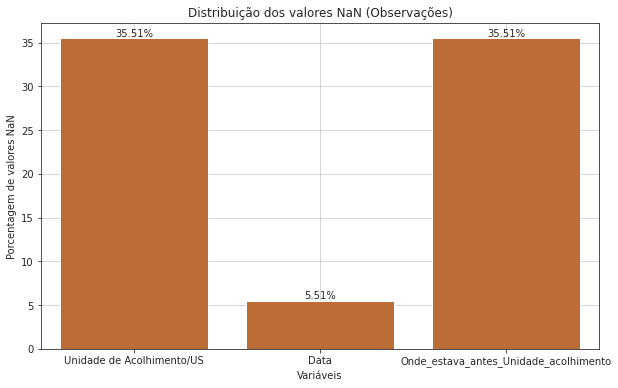

In [18]:
# Contar a quantidade de valores nulos de cada variável
valores_nulos = df_obs.isnull().sum()

# Selecionar apenas as variáveis com valores NaN
variaveis_nulas = valores_nulos[valores_nulos > 0].index

# Calcular a porcentagem de valores NaN em cada variável
porcentagem_nulos = valores_nulos[variaveis_nulas] / len(df) * 100

# Plotar um gráfico de barras com a porcentagem de valores NaN em cada variável
plt.figure(figsize=(10, 6))
sns.set_style('ticks')
sns.barplot(x=variaveis_nulas, y=porcentagem_nulos, color='#D2691E')
plt.title('Distribuição dos valores NaN (Observações)')
plt.xlabel('Variáveis')
plt.ylabel('Porcentagem de valores NaN')
plt.grid(True)


# Adicionar valores das porcentagens nas barras
for i, v in enumerate(porcentagem_nulos):
    plt.annotate(str(round(v, 2)) + '%', xy=(i, v), ha='center', va='bottom')

plt.show()

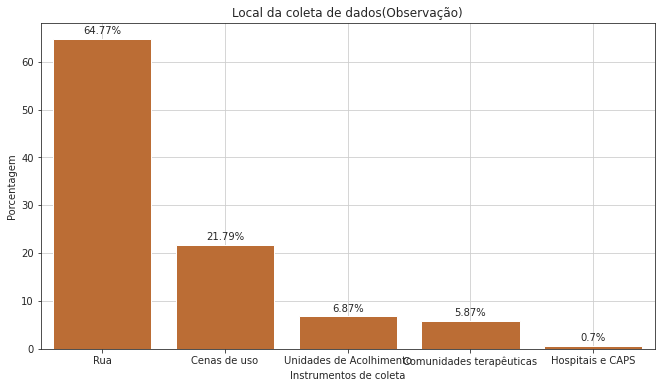

In [19]:
# Calcular a porcentagem de questionários por instrumento de coleta
contagem = df_obs['Local da coleta de dados'].value_counts(normalize=True) * 100
contagem = contagem.round(2)

# Criar o gráfico de barras com seaborn
plt.figure(figsize=(11, 6))
sns.set_style('ticks')
sns.barplot(x=contagem.index, y=contagem, color='#D2691E')

# Adicionar os valores acima de cada barra
for i, v in enumerate(contagem):
    plt.text(i, v+1, str(v) + "%", ha='center', fontsize=10)

# Definir títulos e rótulos dos eixos
plt.title("Local da coleta de dados(Observação)")
plt.xlabel("Instrumentos de coleta")
plt.ylabel("Porcentagem")
plt.grid(True)

plt.show()

In [20]:
df_obs['Local da coleta de dados'].value_counts()

Rua                         1932
Cenas de uso                 650
Unidades de Acolhimento      205
Comunidades terapêuticas     175
Hospitais e CAPS              21
Name: Local da coleta de dados, dtype: int64

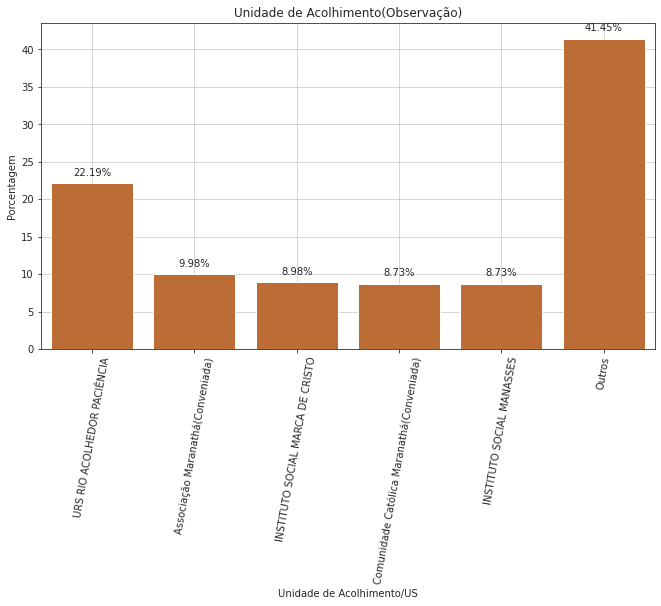

In [21]:
# Obter contagem de valores
contagem = df_obs['Unidade de Acolhimento/US'].value_counts(normalize=True) * 100
contagem = contagem.round(2)

# Selecionar os 5 valores mais relevantes
top_5 = contagem.head(5)

# Somar os valores restantes e criar uma nova entrada "outros"
outros = pd.Series(contagem[5:].sum(), index=['Outros'])

# Concatenar os 5 valores mais relevantes com a entrada "outros"
contagem_final = pd.concat([top_5, outros])

# Criar o gráfico de barras com seaborn
plt.figure(figsize=(11, 6))
sns.set_style('ticks')
sns.barplot(x=contagem_final.index, y=contagem_final, color='#D2691E')

# Adicionar os valores acima de cada barra
for i, v in enumerate(contagem_final):
    plt.text(i, v+1, str(v) + "%", ha='center', fontsize=10)

# Definir títulos e rótulos dos eixos
plt.title("Unidade de Acolhimento(Observação)")
plt.xlabel("Unidade de Acolhimento/US")
plt.ylabel("Porcentagem")
plt.grid(True)
plt.xticks(rotation=80)

plt.show()

In [22]:
df_obs['Unidade de Acolhimento/US'].value_counts()

URS RIO ACOLHEDOR PACIÊNCIA                                                 89
Associação Maranathá(Conveniada)                                            40
INSTITUTO SOCIAL MARCA DE CRISTO                                            36
Comunidade Católica Maranathá(Conveniada)                                   35
INSTITUTO SOCIAL MANASSES                                                   35
Instituto Revivendo com Cristo                                              24
HOTEL SOLIDÁRIO PROFETA GENTILEZA - BONSUCESSO                              22
DOCE MORADA                                                                 14
URS REALENGO                                                                10
URS ILHA DO GOVERNADOR (*)                                                   9
CENTRO PROVISÓRIO DE ACOLHIMENTO V                                           8
URS PROF. NILDA NEY                                                          6
CENTRAL DE RECEPÇÃO DE IDOSOS PASTOR CARLOS PORTELA 

# Entrevista:

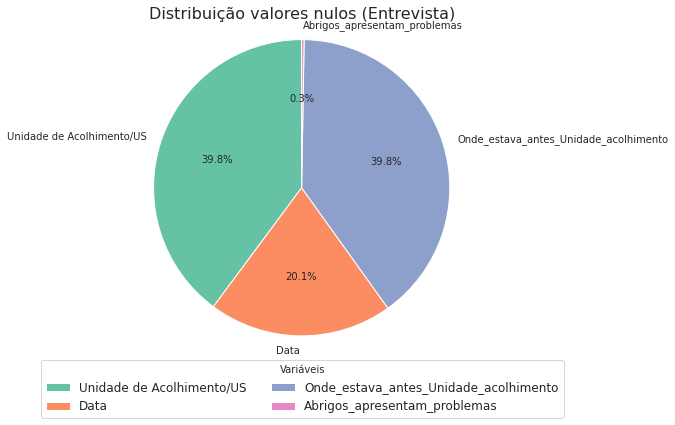

In [23]:
# Calcular o número de valores NaN em cada coluna
enulo = df_ent.isna().sum()
vnames = enulo[enulo != 0].index.tolist()
values = enulo[enulo != 0].tolist()

# Criar o dicionário
dicionario = dict(zip(vnames, values))

# Criar gráfico de pizza
cores = sns.color_palette("Set2", len(dicionario))
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
plt.pie(dicionario.values(), colors=cores, labels=dicionario.keys(), autopct='%1.1f%%', startangle=90)
plt.title("Distribuição valores nulos (Entrevista)", fontsize=16)

# Adicionar legenda
plt.legend(loc="best", fontsize=12, title="Variáveis", bbox_to_anchor=(1.1, -.01),  ncol=2)
plt.axis('equal')
plt.show()

In [24]:
# Reconhecendo as variáveis que possuem dados NaN:
enulo=df_ent.isnull().sum()
for variavel, valor in enulo.items():
    if valor != 0.0:
        print(str(variavel)+' -> '+str(valor))

Unidade de Acolhimento/US -> 2853
Data -> 1436
Onde_estava_antes_Unidade_acolhimento -> 2853
Abrigos_apresentam_problemas -> 19


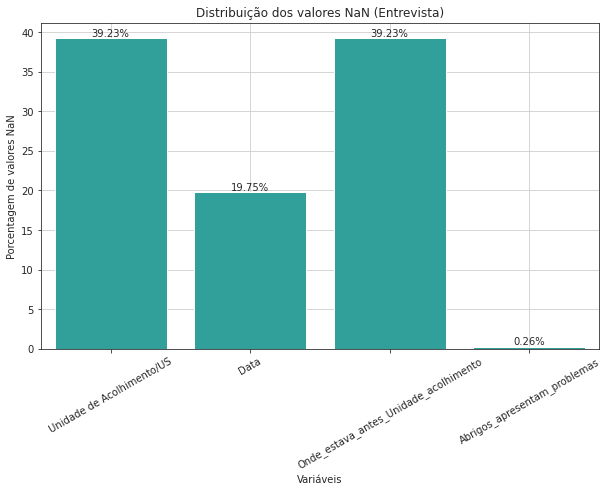

In [25]:
# Contar a quantidade de valores nulos de cada variável
valores_nulos = df_ent.isnull().sum()

# Selecionar apenas as variáveis com valores NaN
variaveis_nulas = valores_nulos[valores_nulos > 0].index

# Calcular a porcentagem de valores NaN em cada variável
porcentagem_nulos = valores_nulos[variaveis_nulas] / len(df) * 100

# Plotar um gráfico de barras com a porcentagem de valores NaN em cada variável
plt.figure(figsize=(10, 6))
sns.set_style('ticks')
sns.barplot(x=variaveis_nulas, y=porcentagem_nulos, color='#20B2AA')
plt.title('Distribuição dos valores NaN (Entrevista)')
plt.xlabel('Variáveis')
plt.ylabel('Porcentagem de valores NaN')
plt.grid(True)
plt.xticks(rotation=30)

# Adicionar valores das porcentagens nas barras
for i, v in enumerate(porcentagem_nulos):
    plt.annotate(str(round(v, 2)) + '%', xy=(i, v), ha='center', va='bottom')

plt.show()

### Questionário Cena de Uso

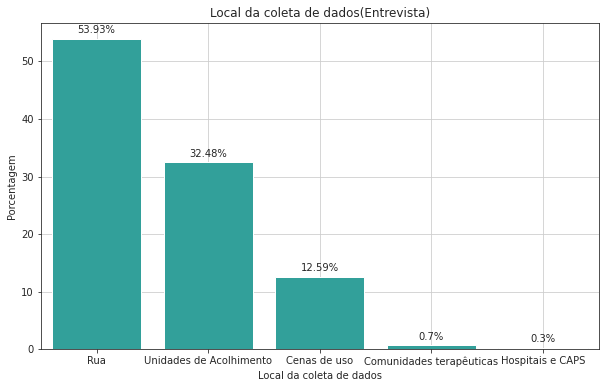

In [26]:
# Calcular a porcentagem de questionários por instrumento de coleta
contagem = df_ent['Local da coleta de dados'].value_counts(normalize=True) * 100
contagem = contagem.round(2)

# Criar o gráfico de barras com seaborn
plt.figure(figsize=(10, 6))
sns.set_style('ticks')
sns.barplot(x=contagem.index, y=contagem, color='#20B2AA')

# Adicionar os valores acima de cada barra
for i, v in enumerate(contagem):
    plt.text(i, v+1, str(v) + "%", ha='center', fontsize=10)

# Definir títulos e rótulos dos eixos
plt.title("Local da coleta de dados(Entrevista)")
plt.xlabel("Local da coleta de dados")
plt.ylabel("Porcentagem")
plt.grid(True)

plt.show()

In [27]:
df_ent['Local da coleta de dados'].value_counts()

Rua                         2313
Unidades de Acolhimento     1393
Cenas de uso                 540
Comunidades terapêuticas      30
Hospitais e CAPS              13
Name: Local da coleta de dados, dtype: int64

### Abrigo

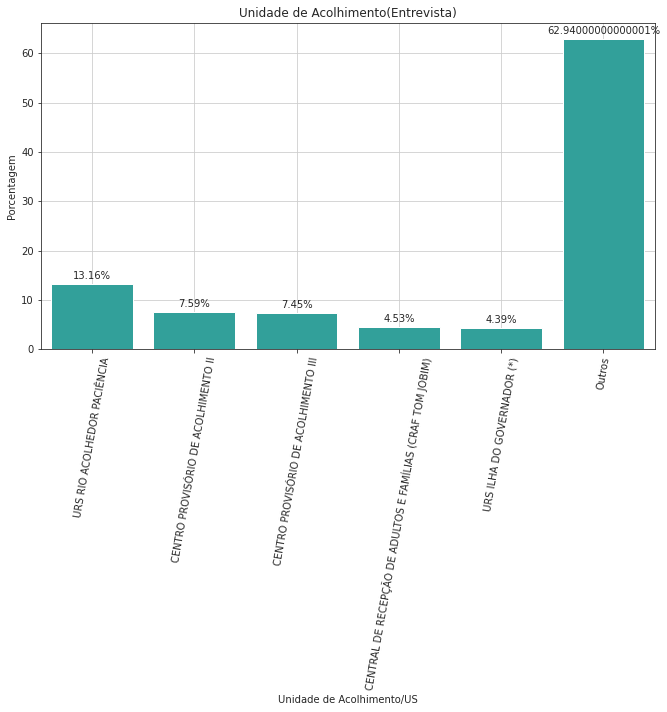

In [28]:
# Obter contagem de valores
contagem = df_ent['Unidade de Acolhimento/US'].value_counts(normalize=True) * 100
contagem = contagem.round(2)

# Selecionar os 5 valores mais relevantes
top_5 = contagem.head(5)

# Somar os valores restantes e criar uma nova entrada "outros"
outros = pd.Series(contagem[5:].sum(), index=['Outros'])

# Concatenar os 5 valores mais relevantes com a entrada "outros"
contagem_final = pd.concat([top_5, outros])

# Criar o gráfico de barras com seaborn
plt.figure(figsize=(11, 6))
sns.set_style('ticks')
sns.barplot(x=contagem_final.index, y=contagem_final, color='#20B2AA')

# Adicionar os valores acima de cada barra
for i, v in enumerate(contagem_final):
    plt.text(i, v+1, str(v) + "%", ha='center', fontsize=10)

# Definir títulos e rótulos dos eixos
plt.title("Unidade de Acolhimento(Entrevista)")
plt.xlabel("Unidade de Acolhimento/US")
plt.ylabel("Porcentagem")
plt.grid(True)
plt.xticks(rotation=80)

plt.show()

In [29]:
df_ent['Unidade de Acolhimento/US'].value_counts()

URS RIO ACOLHEDOR PACIÊNCIA                                                   189
CENTRO PROVISÓRIO DE ACOLHIMENTO II                                           109
CENTRO PROVISÓRIO DE ACOLHIMENTO III                                          107
CENTRAL DE RECEPÇÃO DE ADULTOS E FAMÍLIAS (CRAF TOM JOBIM)                     65
URS ILHA DO GOVERNADOR (*)                                                     63
                                                                             ... 
CENTRO DE AMPARO E RECUPERAÇÃO AOS MORADORES DE RUA E DEPENDENTES QUÍMICOS      1
VIVA CAZUZA                                                                     1
ABRIGO EVANGÉLICO DA PEDRA DE GUARATIBA                                         1
COMUNIDADE TERAPÊUTICA JESUS É O CAMINHO                                        1
SODALÍCIO DA SACRA FAMÍLIA                                                      1
Name: Unidade de Acolhimento/US, Length: 63, dtype: int64